# **Prácticas unidad 3**
## Objetivo general de la práctica
#### Desarrollar habilidades para **generar variables aleatorias a partir de diferentes distribuciones mediante el método de la transformada inversa**. Esto permitirá comprender la aplicación del método en problemas reales donde los tiempos, la demanda y la frecuencia de eventos aleatorios influyen en el comportamiento de un sistema.

### Importar bibliotecas

In [99]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import comb
import scipy.stats as stats

### **Problema 1: Distribución Binomial**
#### **Contexto:** Un distribuidor de artículos electrónicos recibe varios pedidos diarios. Cada día, el distribuidor tiene una probabilidad de éxito de cumplir un pedido (es decir, de tener en stock los artículos solicitados) del 70%. Desea simular la cantidad de pedidos diarios que logra satisfacer para gestionar adecuadamente sus inventarios y minimizar las faltantes de stock.
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNuY69QDN43x9My39TpoLx_2aDjIm75cTdbg&s" width="200" height="200"/>

#### **Objetivo:** Generar una variable aleatoria que simule el número de pedidos satisfechos **por día durante una semana**, considerando que cada día el distribuidor recibe 20 pedidos.
#### Función de densidad:
$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$
#### Transformada inversa de la función de densidad:
$$
f(k)=P(x\le k)=\sum_{k}^{i=0}P(x=i)
$$

[13, 15, 15, 16, 11, 14, 13]


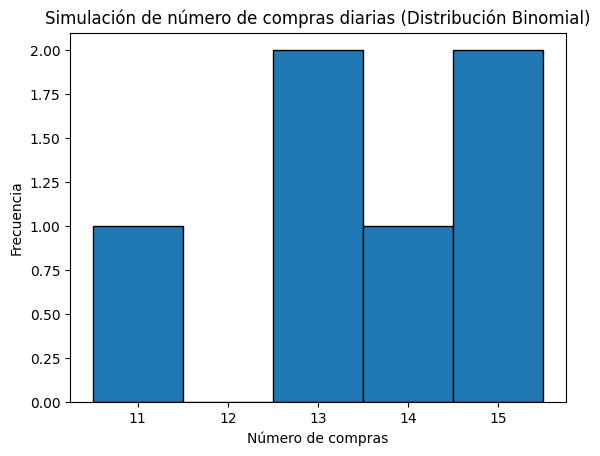

In [100]:
n = 20  
p = 0.70 
dias = 7 
u = np.random.uniform(0, 1, dias)
def binomial_fda(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def inversa_binomial(n, p, u):
    F_k = 0  
    k = 0
    while True:
        F_k += binomial_fda(n, k, p)  
        if u <= F_k:
            return k  
        k += 1

compras = [inversa_binomial(n, p, u) for u in u]
print(compras [:7])
plt.hist(compras, bins=np.arange(min(compras), max(compras) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de número de compras diarias (Distribución Binomial)")
plt.xlabel("Número de compras")
plt.ylabel("Frecuencia")
plt.show()

#### **Conclusión:** Las simulaciones del número de compras durante una semana, apunta que cada día más de la mitad de los clientes suelen comprar comprar algo teniendo que entran aproximadamente 20 clientes a la tienda diariamente.

## **Problema 2: Distrbución exponencial**
#### **Contexto:** Una estación de carga rápida para vehículos eléctricos quiere simular el tiempo entre la llegada de los vehículos para prever la cantidad de puntos de carga necesarios durante el día. La llegada de los vehículos sigue una distribución exponencial con una tasa de 1 llegada cada 15 minutos, en promedio
<img source="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVqSM_iqb8ddCekB1FIsIm58uGgWOu2bKo7Q&s" width="200" height="200"/>

#### **Objetivo:** Generar tiempos entre llegadas de vehículos eléctricos durante un día de operación (12 horas).
#### Función de densidad:
$$
f(x) = \lambda e^{ -\lambda x }
$$
#### Transformada inversa de la función de densidad:
$$
x=-\frac{1}{\lambda}ln(1-u)
$$

[ 0.73186635  0.80286496  2.53544988 10.54873996 15.21535776 25.69668073
  5.18658516  8.03710479 18.15826541  9.99023985  4.00909811 15.28980174
 25.60036861 20.52444103  9.58223443  1.35367672 17.49267563  2.68284175
  2.70687669  3.29178031  5.33462716 46.83400415 37.00011616 23.5154742
 45.24937553  5.77533061  5.32741144 22.21833735  0.81641005  0.1366463
 22.65499496 15.15695854 22.92490867 19.00865046 15.7573497  10.69808599
 11.70348431 25.9590478  12.76397432  4.35655522  1.15576672  5.33228825
  9.16880408  5.52970279 37.60936875  7.37261054 31.05170279  5.5081936
  1.50204313  5.20366352  1.88130603 26.30369276 49.47312621]
llegadas:  53
Tiempo total 739.7209619679871


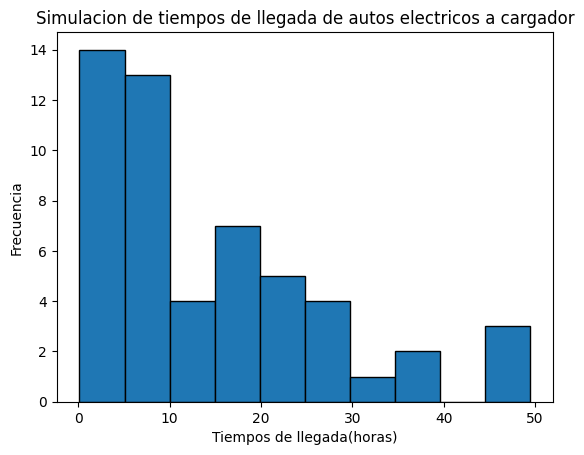

In [101]:
lambda_i=1/15 #inverso de los tiempos de llegada (15 minutos)
dia=720 #12 horas (un dia de trabajo) equivalen a 720 minutos
tiempo_total=0
tiempos_llegada=[]
llegadas=0
def valores_x2(lambda_i):
    u=np.random.uniform(0,1)
    x=-1/lambda_i * np.log(1-u)
    return x
while tiempo_total<dia:
    tiempos_x= valores_x2(lambda_i)
    tiempo_total=tiempo_total+tiempos_x
    tiempos_llegada.append(tiempos_x)
    llegadas=llegadas+1
tiempos_llegada=np.array(tiempos_llegada)
print(tiempos_llegada[:llegadas])
print("llegadas: ",llegadas)
print("Tiempo total",tiempo_total)
plt.hist(tiempos_llegada,bins=10,edgecolor='black' )
plt.title('Simulacion de tiempos de llegada de autos electricos a cargador')
plt.xlabel('Tiempos de llegada(horas)')
plt.ylabel('Frecuencia')
plt.show()

#### **Conclusión:** Durante un día el cargador tiene númerosas llegadas, dado a que los carros tardan alrededor de 10 minutos en llegar, dando un promedio de 50 llegadas al día.

## **Problema 3:** Distribución LogNormal
#### **Contexto:** En una tienda departamental de electrónica, los tiempos de espera de los clientes para recibir atención en el mostrador de servicio técnico tienen una distribución lognormal. Se sabe que el tiempo promedio de espera es de 10 minutos y una desviación estándar de 2 minutos, lo que genera una cola considerable en ciertos momentos del día.
<img source="https://corporate.bestbuy.com/wp-content/uploads/2022/07/5k-Carousel-Crop-1-368x368.png" width="200" height="200"/>

#### **Objetivo:** Generar tiempos de espera para 50 clientes en el mostrador de servicio y analizar la duración de la fila de espera.
#### Función de densidad:
$$
f(x) = \frac{1}{x \sigma \sqrt{2 \pi}} e^{ -\frac{(\ln x - \mu)^2}{2 \sigma^2} }
$$
#### Transformada inversa de la función de densidad:
$$
x=e^{\mu+\sigma*\Phi^{-1}(U)}
$$


[12.52818896 10.88081806 11.42137909  6.79427225 11.16372192 12.7326454
  5.12710506  5.83765569 10.65839272  8.67356102 10.17273868 11.1437162
 12.28499785  9.22177989  8.14421158 11.40662089  9.81822604 11.60064341
 10.47587119  8.48534506  6.70393645  8.62430439 11.38533223  8.91203054
  9.85896007 10.30778245 13.38025461 10.45486233  8.46558119 10.98335916
  8.92343957 10.76372567  8.57532137 11.34695774  9.91703649 11.48803268
 10.47150544 10.74236896  7.96008689  8.55564964 12.84638317  6.24645874
  7.78425467 10.54049217 10.71294166  8.75593644  8.05507428  7.80312769
 12.10082618  8.49005511]
Duración total de la cola:  489.72796893693675  minutos


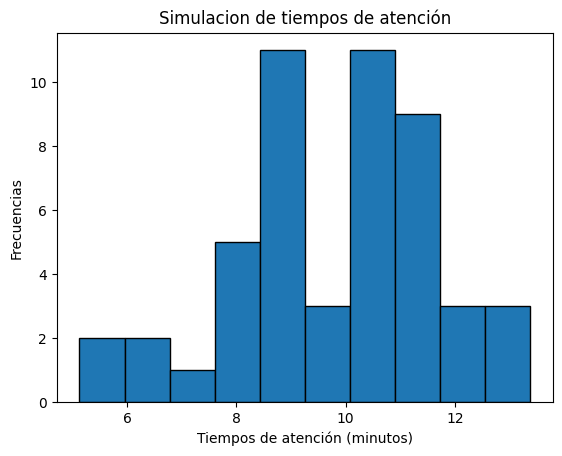

In [102]:
mu=10
sigma=2
n=50
def valores_z(mu,sigma,n):
    u=np.random.uniform(0,1,n)
    exponente=mu+sigma*stats.norm.ppf(u)
    z=np.exp(exponente)
    return z
#tiempos_z=valores_z(mu,sigma,n)
tiempos_z=np.log(valores_z(mu,sigma,n))
print(tiempos_z[:50])
print ("Duración total de la cola: ",sum(tiempos_z)," minutos")
plt.hist(tiempos_z,bins=10,edgecolor='black' )
plt.title('Simulacion de tiempos de atención')
plt.xlabel('Tiempos de atención (minutos)')
plt.ylabel('Frecuencias')
plt.show()

#### **Conclusión:** Las simulaciones arrojan que casi todos los clientes duran en ser atendidos de 9-11 minutos, lo cual suele dar un tiempo total de duración de la cola de aproximadamente 500 minutos (8.3 horas aprox), por lo que se puede decir facilmente que hay bastante congestión en el mostrador de servicio. 